In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples= 100, n_features = 2, n_informative = 2, n_targets = 1, noise = 50)

In [3]:
X

array([[ 0.27238873, -0.74644343],
       [ 1.22668437,  1.01041882],
       [ 0.73358795, -0.34012481],
       [ 0.1225754 ,  0.1135457 ],
       [ 0.87081533, -1.1680207 ],
       [ 0.29746031, -0.20349023],
       [-0.48740797,  0.10790346],
       [-0.20439702, -0.90841881],
       [-1.22958787, -0.43466163],
       [ 0.37338915,  1.67459437],
       [ 0.02725818,  0.68106253],
       [ 0.29283093, -0.74985488],
       [ 0.0124742 ,  1.35195436],
       [-0.63519623, -0.45714138],
       [-1.29085191,  0.44046224],
       [-0.82582643, -0.1652167 ],
       [ 1.77016213, -1.18714032],
       [-0.08971091, -0.04981938],
       [ 0.4017661 ,  0.28329861],
       [ 1.77860761,  0.0390048 ],
       [ 1.08350619, -1.45776562],
       [ 0.23556474, -0.75488072],
       [ 0.71182685,  0.65819601],
       [ 2.02121323,  0.21732451],
       [ 1.39303739,  0.61260184],
       [-1.02438733,  1.14281969],
       [-0.17091356,  0.56719174],
       [-0.27756137, -1.0786755 ],
       [ 2.07423624,

In [4]:
y

array([ -79.13672368,  155.31367341,  -52.8683727 ,  -10.95342981,
        -31.09222616,    4.74120521,  -10.74333404,   34.90805371,
        -69.34265624,  205.98715548,   32.57623258,  -51.48457884,
        109.12117525,  -46.72796617,  -78.2982629 ,  -71.76907909,
        -20.26397979,  -40.79353055,  -23.00267926,    4.62686955,
       -106.74694192,  -61.04676497,   73.29274439,  160.91878636,
        184.32062684,  -21.16924651,  113.02079511,  -12.39998203,
        239.46728949,  -13.33451367,   29.22206576, -146.77251321,
        107.38863541,   -1.86494918,   17.12612805, -206.2329668 ,
        -90.22665903,  -52.444702  ,   64.73434424,  102.45159933,
         36.06071589,  -99.61697524,   45.90990993,   -0.40091502,
       -125.74879045,  129.27884992,   88.51040724,   39.36979086,
        -47.79788242,  -59.15392345,  -29.63981929,   89.13372582,
         33.43582632,  -62.90075306,  -66.35319315,   80.19109025,
        -35.12892191,   -2.7140031 ,  101.08645235,  -93.02616

In [5]:
df = pd.DataFrame({
    'feature1' : X[:,0],
    'feature2' : X[:,1],
    'target' : y
})

In [6]:
df.head()

,feature1,feature2,target
0,0.272389,-0.746443,-79.136724
1,1.226684,1.010419,155.313673
2,0.733588,-0.340125,-52.868373
3,0.122575,0.113546,-10.953430
4,0.870815,-1.168021,-31.092226


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score 
# Calculate MAE and R2 score
print('mae:', mean_absolute_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))

mae: 40.44424857202856
r2 score: 0.761303455703372


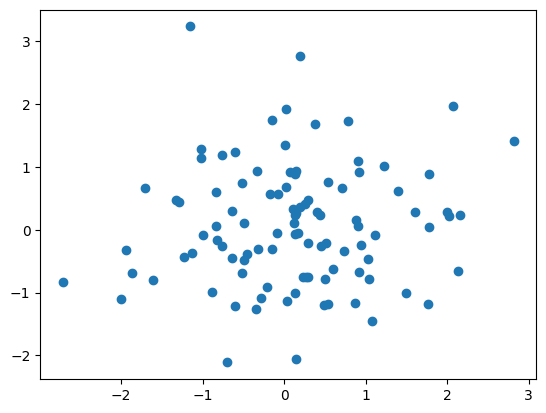

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df.feature1, df.feature2)

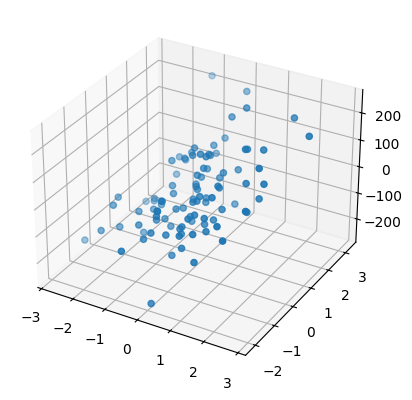

In [11]:
ax = plt.subplot(projection = '3d')
ax.scatter3D(df.feature1, df.feature2, df.target)

In [13]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.show(renderer='browser')

In [16]:
# Step 3: Create the 3D scatter plot of the points
fig = go.Figure()

# Scatter plot of the data points
fig.add_trace(go.Scatter3d(
    x=df['feature1'],
    y=df['feature2'],
    z=df['target'],
    mode='markers',
    marker=dict(size=5, color='blue')
))

# Step 4: Create the regression surface
# Create a grid of values for feature1 and feature2
x_grid, y_grid = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 20),
                             np.linspace(df['feature2'].min(), df['feature2'].max(), 20))

# Flatten the grid for prediction
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Predict the target using the trained model
z_grid = lr.predict(xy_grid)

# Reshape the predictions to match the grid
z_grid = z_grid.reshape(x_grid.shape)

# Surface plot of the regression surface
fig.add_trace(go.Surface(
    x=x_grid,
    y=y_grid,
    z=z_grid,
    opacity=0.5,  # Make surface slightly transparent
    colorscale='Viridis',  # Surface color map
))

# Update layout for better readability
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Target'
    ),
    title="3D Scatter Plot with Regression Surface"
)

# Show the plot
fig.show(renderer='browser')